In [2]:
import numpy as np
import pandas as pd

# ml libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# visualization libraries
from matplotlib import pyplot as plt

# Apple's conversion tool
import coremltools as ct

# Outline

### Decision Trees

### Random Forests
- What random forest is
    - Explain that random forest is a solution to some of the issues with overfitting found in the decision tree model
    - Explain Bagging only as it relates to random forests
    - Explain the stucture of many decision trees, and how they are aggregated
- How it can be used for feature selection
    - Load up the final dataset - pima diabetes

### Using feature selection in other models
- Logistic regression, same pima dataset

### Other Feature Selection Techniques
- Other techniques mention
    - Grab from generated list below

# Transition Intro (show during linear regression slide)
## Selecting features to use in our last model
When we are building machine learning models, we're constantly looking for features that can help explain something that we are trying to predict or study.  In our last sessions, we created a linear regression model that predicted the temperature in fahrenheit based off of date components.  Basically, there was a linear relationship between the hours of the day and the temperature, and we added more features to improve the model.

<mark>post link to file in chat</mark>
https://myteams.toyota.com/:f:/r/sites/DnAi-PythonCommunityofPractice/Shared%20Documents/General/22.12.14%20Linear%20Regression%202?csf=1&web=1&e=ngBnot

<mark>Point at graphs on slide</mark>
Initially, we picked our features arbitrarily - we broke apart the date into components (day, month, year), and then used those as features to predict the temperature.

We picked some features, but how do we know which ones were strongest?
- When we looked at our data with weather, we could see that some features had a higher pearson r value than others, and that this helped us understand how linearly related a feature was to explaining the variance in the temperature (in isolation)
    - <mark>Show some code/output/images from the last notebook illustrating the `df.corr()` function</mark>
        - Point to `temp_humid.corr()` code
        - Point out season_num, humidity, and hour as strong features
        - Point out how little of an effect day has, and speak to how this adds noise to the data since the model expects the feature to be describing variance in the data
- The model we created was a linear regression. Since it was a linear regression, the coefficients are helpful in interpreting the model when understanding how the features are working together to describe the predictor variable
    - show equation y = mx + b and explain that the magnitude of m shows how important that feature was in describing the variance in what we are predicting
        - the m is your coefficient of a feature called x, and b is where it crosses over the y-axis
    - sklearn linear models allow you to view the coefficients used by their model, giving you a better sense of the impact they have together on the variance of a variable

<mark>Switch back to slides, go to This Session, then read text below</mark>
## transition to feature selection using other models
- Explain that there are other ways of explaining feature importances, and we'll be learning about another model later - random forests - that can be used to find feature importances as well.  Why would you pick one method over the other?
    - Ideally, you choose a data model that best fits the reality of your data.  For example, if you see clearly linear relationships between your features then a linear model makes sense
    - Tree models are decision-based, so data that naturally fits into that (for example: most consumers won't pay over a certain amount for an item, and the data shows this)
    - More human-like behavior is often modeled with complex nueral networks - generative AI, like the image generators that take your text and convert it into images, and chat bots
        - https://openai.com/dall-e-2/

## Which model is better?

<mark>reword this</mark>
Which model is better? It depends on the problem at hand. If the relationship between the features and the response is well approximated by a linear model, then an approach such as linear regression will likely work well, and will outperform a method such as a regression tree that does not exploit this linear structure. If instead there is a highly non-linear and complex relationship between the features and the response as indicated by model, then decision trees may outperform classical approaches.

Other considerations beyond simply test error may come into play in selecting a statistical learning method; for instance, in certain set- tings, prediction using a tree may be preferred for the sake of interpretability and visualization.

The building blocks of random forests are decision trees.  Let's make one!

<mark>switch to AAP notebook starter code</mark>

# Intro to Decision Trees

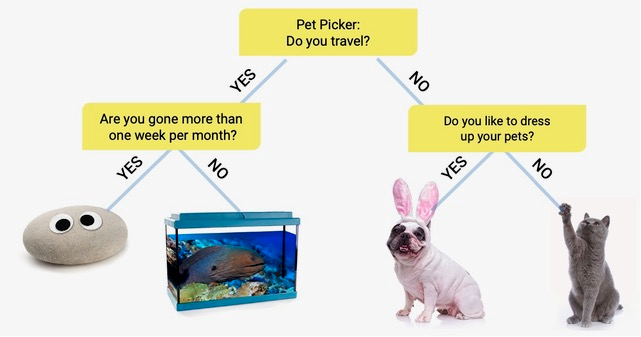

### Decision Trees


## Why linear regression is not a good choice for this problem
4.1 - 4.2
Unfortunately, in general there is no natural way to convert a qualitative response variable with more than two levels into a quantitative response that is ready for linear regression.

if we use linear regression, some of our es- timates might be outside the [0, 1] interval (see Figure 4.2), making them hard to interpret as probabilities! Nevertheless, the predictions provide an ordering and can be interpreted as crude probability estimates

there are at least two reasons not to perform classifica- tion using a regression method: (a) a regression method cannot accommo- date a qualitative response with more than two classes; (b) a regression method will not provide meaningful estimates of Pr(Y |X), even with just two classes. Thus, it is preferable to use a classification method that is truly suited for qualitative response values

## An Overview of Classification
    - linear regression assumes response variable y is quantitative
    - if our variable is qualitative (a.k.a. categorical), we need to use a classification technique
    - classification is different than what we did with the temperature estimates - rather than predict a number, we're going to pick a class
        - predicting a qualitative observation is known as classifying that observation
        - examples: guessing eye color, if something is good/bad, whether a transaction is fraudulent, etc
        - You can also take something like health data - using various patient metrics of people with and without a disease, then find out which factors may lend themselves to the disease
        - Some argue that classification problems occur more often than regresssion problems
    - There's many classification models: such as logistic regression, linear discriminant analysis, quadratric discriminant analysis, naive Bayes, and K-nearest neighbors.
        - more computationally intensive models are: trees, random forests, boosting, and support vector machines
    - Shout out to the survey at this point acknowledge the interest in many of these models

### Decision Trees
- What a decision tree is
    - Decision trees are building blocks of random forests
    - ISLR - 8.1 - The Basics of Decision Trees

These involve stratifying or segmenting the predictor space into a number of simple regions. In order to make a prediction for a given observation, we typically use the mean or the mode response value for the training observations in the region to which it belongs. <mark>check that this is needed to mention for classification or not</mark>

Tree-based methods are simple and useful for interpretation. However, they typically are not competitive with the best supervised learning approaches.

Each of these approaches involves producing multiple trees which are then combined to yield a single consensus prediction. We will see that combining a large number of trees can often result in dramatic improvements in prediction accuracy, at the expense of some loss in interpretation.

## Intro to pet example
- You can think of them as flow-charts, or a series of if-else statements
- For example (go into first basic data example)
    - Use picking a pet example

# Decision Tree Breakdown
Breakdown of decision tree components:
- root node: begins splitting process, focused on the variable that best splits the target variable
    - splits to the left are yes or true, while splits to the right are no or false
- node purity: impure nodes are a mix of both classes of a target variable, whearas pure nodes have only one class (colored in this image)
    - more than one way of doing this - entropy and gini index
    - <mark>The Gini Index or Impurity measures the probability for a random instance being misclassified when chosen randomly. The lower the Gini Index, the better the lower the likelihood of misclassification.  __Simple calculation on first tree__: take number of yes's from root node and divide by number of no's</mark>
    - Gini impurity is calculated by subtracting the sum of the squared probabilities of each class from one.
- decision nodes: subsequent nodes from the root where the target variable is again split by other variables
- leafe nodes and terminal nodes are the pure nodes, so they are used for making a prediction

When we reduce the number of levels in the tree, how do you think it chooses a feature?

## Additional info on Gini
The division is called pure if all elements are accurately separated into different classes (an ideal scenario). The Gini impurity (pronounced “genie”) is used to predict the likelihood that a randomly selected example would be incorrectly classified by a specific node. It is called an “impurity” metric because it shows how the model differs from a pure division.

The degree of Gini impurity ranges from 0 to 1, with 0 indicating that all of the elements belong to a single class and 1 indicates that only one class exists. The Gini impurity of value 1 indicates that all of the items are randomly distributed over various classes, whereas a value of 0.5 indicates that the elements are uniformly distributed across some classes.

The Gini Impurity favours bigger partitions (distributions) and is simple to implement, whereas information gains favour smaller partitions (distributions) with a variety of diverse values, necessitating a data and splitting criterion experiment.

When working with categorical data variables, the Gini Impurity returns either “success” or “failure” and solely does binary splitting;
> https://analyticsindiamag.com/gini-impurity-vs-information-gain-vs-chi-square-methods-for-decision-tree-split/
> https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c

Work through the logic above, and you can start to see how the tree we started with was reconstructed into the model from the data we provided.  Can you see any issues with how the tree is constructed now?

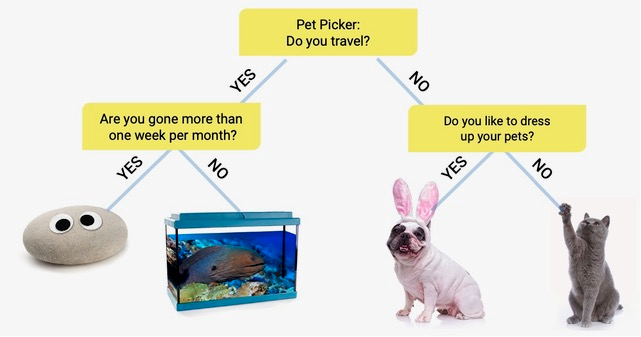

Work through the logic above, and you can start to see how the tree we started with was reconstructed into the model from the data we provided. Can you see any issues with how the tree is constructed now?

<mark>Questions to ask:</mark>
- Do you see any differences in the tree that sklearn developed versus the image we worked off of when creating the data?
- Were you suprised that they would look different?

> More information on Scikit's DecisionTreeClassifier
> - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# What are the limits of this model?
- Can you think of things that are not being covered by this model?
- Are all of these decisions mutually exclusive?
- Are there other features we're not considering?
- Do all features add significant value?

# Feature importances
Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

> https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3#:~:text=Feature%20importance%20is%20calculated%20as,the%20more%20important%20the%20feature.

### Gini and splits
<mark>go into detail if you have time, otherwise provide links</mark>
for a regression tree, the predicted response for an observation is given by the mean response of the training observations that belong to the same terminal node. In contrast, for a classification tree, we predict that each observation belongs to the most commonly occurring class of training observations in the region to which it belongs. <mark>In interpreting the results of a classification tree, we are often interested not only in the class prediction corresponding to a particular terminal node region, but also in the class proportions among the training observations that fall into that region.</mark>

<mark>we use recursive
binary splitting to grow a classification tree. However, in the classification
setting, RSS cannot be used as a criterion for making the binary splits.
A natural alternative to RSS is the classification error rate. Since we plan
to assign an observation in a given region to the most commonly occurring class of training observations in that region, the classification error rate is
simply the fraction of the training observations in that region that do not belong to the most common class:</mark>

a measure of total variance across the K classes. It is not hard to see that the Gini index takes on a small value if all of the pˆmk’s are close to zero or one. For this reason the Gini index is referred to as a measure of node purity—a small value indicates that a node contains predominantly observations from a single class.
An alternative to the Gini index is entropy,
One can show that the entropy will take on a value near zero if the pˆmk’s are all near zero or near one. Therefore, like the Gini index, the entropy will take on a small value if the mth node is pure. In fact, it turns out that the Gini index and the entropy are quite similar numerically.
When building a classification tree, either the Gini index or the entropy are typically used to evaluate the quality of a particular split, since these two approaches are more sensitive to node purity than is the classification error rate. Any of these three approaches might be used when pruning the tree, but the classification error rate is preferable if prediction accuracy of the final pruned tree is the goal.

a surprising characteristic: some of the splits yield two terminal nodes that have the same predicted value

<mark>example needs context to adapt to this</mark>
Why, then, is the split performed at all? The split is performed because it leads to increased node purity. That is, all 9 of the observations corresponding to the right-hand leaf have a response value of Yes, whereas 7/11 of those corresponding to the left-hand leaf have a response value of Yes. Why is node purity important? Suppose that we have a test obser- vation that belongs to the region given by that right-hand leaf. Then we can be pretty certain that its response value is Yes. In contrast, if a test observation belongs to the region given by the left-hand leaf, then its re- sponse value is probably Yes, but we are much less certain. Even though the split RestECG<1 does not reduce the classification error, it improves the Gini index and the entropy, which are more sensitive to node purity.

## Benefits and negatives of decision trees
Good
- Trees are very easy to explain to people. In fact, they are even easier to explain than linear regression!
- Some people believe that decision trees more closely mirror human decision-making than do the regression and classification approaches seen in previous chapters.
- Trees can be displayed graphically, and are easily interpreted even by a non-expert (especially if they are small).
- Trees can easily handle qualitative predictors without the need to create dummy variables.

Bad
- Unfortunately, trees generally do not have the same level of predictive accuracy as some of the other regression and classification approaches seen in this book.
- Additionally, trees can be very non-robust. In other words, a small change in the data can cause a large change in the final estimated tree.

However, by aggregating many decision trees, using methods like bagging, random forests, and boosting, the predictive performance of trees can be substantially improved. We introduce these concepts in the next section.

<mark>end of decision tree info?</mark>

## more about evaluating classification results
- Uncertainty levels, bootstrapping
- To see how precision varies

## Random Forests
- Begin looking at ways of visualizing their process of construction

# Part 2 - Random Forests (setup)
It is more commonly used on our teams, therefore people have greater familiarity with it and can work with it better

## Ensemble methods
An ensemble method is an approach that combines many simple “building block” models in order to obtain a single and potentially very powerful model. These simple building block models are sometimes known as weak learners, since they may lead to mediocre predictions on their own.

## Issues with decision trees, intro to bagging
The decision trees discussed in Section 8.1 suffer from high variance. This means that if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get could be quite different. In contrast, a procedure with low variance will yield similar results if applied repeatedly to distinct data sets; linear regression tends to have low variance, if the ratio of n to p is moderately large. Bootstrap aggregation, or bagging, is a general-purpose procedure for reducing the variance of a statistical learning method; we introduce it here because it is particularly useful and frequently used in the context of decision trees.

averaging a set of observations reduces variance. Hence a natural way to reduce the variance and increase the test set ac- curacy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions.

this is not practical because we generally do not have access to multiple training sets. Instead, we can bootstrap, by taking repeated samples from the (single) training data set. In this approach we generate B different bootstrapped training data sets. We then train our method on the bth bootstrapped training set in order to get fˆ∗b(x), and finally average all the predictions,
This is called bagging.

## Bagging in regression
While bagging can improve predictions for many regression methods, it is particularly useful for decision trees. To apply bagging to regression trees, we simply construct B regression trees using B bootstrapped training sets, and average the resulting predictions. These trees are grown deep, and are not pruned. Hence each individual tree has high variance, but low bias. Averaging these B trees reduces the variance. Bagging has been demonstrated to give impressive improvements in accuracy by combining together hundreds or even thousands of trees into a single procedure.

## Bagging in classification

<mark>Shorten this, mention that it is an element of random forests and provide a link with more detail</mark>

How can bagging be extended to a classification problem where Y is qualitative? In that situation, there are a few possible approaches, but the simplest is as follows. For a given test observation, we can record the class predicted by each of the B trees, and take a majority vote: the overall prediction is the most commonly occurring majority class among the B predictions.

The number of trees B is not a critical parameter with bagging; using a very large value of B will not lead to overfitting. In practice we use a value of B sufficiently large that the error has settled down.

There is a very straightforward way to estimate the test error of a bagged model, without the need to perform cross-validation or the validation set approach. Recall that the key to bagging is that trees are repeatedly fit to bootstrapped subsets of the observations. One can show that on average, each bagged tree makes use of around two-thirds of the observations.3 The remaining one-third of the observations not used to fit a given bagged tree are referred to as the out-of-bag (OOB) observations

In order to obtain a single prediction for the ith observation, we can average these predicted responses (if regression is the goal) or can take a majority vote (if classification is the goal). This leads to a single OOB prediction for the ith observation. An OOB prediction can be obtained in this way for each of the n observations

overall OOB MSE (for a regression problem) or classification error (for a classification problem) can be computed. The resulting OOB error is a valid estimate of the test error for the bagged model, since the response for each observation is predicted using only the trees that were not fit using that observation.


In [3]:
pima = pd.read_csv('data/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# from sklearn.model_selection import train_test_split
y = pima.Outcome.values
X = pima.drop(columns='Outcome').values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)  # TODO: see if you want to keep stratify in here (more explaining)

# Random forests (detailed)
## how splits are performed in random forests
In building a random forest, at each split in the tree, the algorithm is not even allowed to consider a majority of the available predictors

Random forests overcome this problem by forcing each split to consider only a subset of the predictors. Therefore, on average (p − m)/p of the splits will not even consider the strong predictor, and so other predictors will have more of a chance. We can think of this process as <mark>decorrelating</mark> the trees, thereby making the average of the resulting trees less variable and hence more reliable.

## difference between random forest and bagging
The main difference between bagging and random forests is the choice of predictor subset size m. For instance, if a random forest is built using m = p, then this amounts simply to bagging. On the Heart data, random forests using m = √p leads to a reduction in both test error and OOB error over bagging

## tweaking parameters
Using a small value of m in building a random forest will typically be helpful when we have a large number of correlated predictors.

As with bagging, random forests will not overfit if we increase B, so in practice we use a value of B sufficiently large for the error rate to have settled down.

## Advantages of random forests vs bagging
Trees are an attractive choice of weak learner for an ensemble method for a number of reasons, including their flexibility and ability to handle predictors of mixed types (i.e. qualitative as well as quantitative)

In bagging, the trees are grown independently on random samples of the observations. Consequently, the trees tend to be quite similar to each other. Thus, bagging can get caught in local optima and can fail to thoroughly explore the model space.


## What if I want to compare this decision tree to other models that are sensitive to things like variance (such as a logistic regression)?
We can use a scaler on the data before we feed it into our tree model and any other models we want to compare to!
- <mark>Add a link to information about this</mark>

In [6]:
# create a StandardScaler instance
scaler = StandardScaler()

# fit the StandardScaler
X_scaler = scaler.fit(X_train)

# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# export data for download (may need target included)
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df['y'] = y_train
X_train_scaled_df.columns = pima.columns
X_train_scaled_df.to_csv('data/x_train.csv', index=False)

X_test_scaled_df = pd.DataFrame(X_test_scaled)
X_test_scaled_df['y'] = y_test
X_test_scaled_df.columns = pima.columns
X_test_scaled_df.to_csv('data/x_test.csv', index=False)

In [7]:
X_train_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.855471,0.007329,0.472598,1.152080,-0.036333,0.883020,-0.658457,-0.466486,0
1,2.467805,-1.032245,0.258507,1.215118,-0.222688,0.411934,-0.306999,1.218656,0
2,-0.855471,-0.402200,-0.490811,1.593344,0.932716,0.437398,-0.195854,-0.803514,0
3,-1.157587,-0.496707,1.114871,-1.306391,-0.725848,-0.313792,-0.850708,1.050142,0
4,-0.855471,-0.118680,-0.490811,0.143476,0.261836,0.220954,-0.042655,-0.550743,0


In [8]:
# TODO: samples to try in app
X_train_scaled_df[X_train_scaled_df['Outcome'] == 1].head()
# X_train_scaled_df.columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,0.050877,0.133338,0.579644,-1.306391,-0.725848,0.029973,0.167620,-0.550743,1
8,1.259341,0.700378,-0.169675,-1.306391,-0.725848,0.361006,-1.054974,0.628856,1
11,1.561457,1.582440,2.185326,0.206514,1.510418,1.697870,0.723344,1.724199,1
14,0.957225,0.826387,0.365553,-1.306391,-0.725848,0.933948,-0.670473,0.797371,1
15,1.863573,1.487933,0.258507,-1.306391,-0.725848,0.755699,0.170623,0.039057,1


In [9]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)
X_train_scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,576.000000000,576.000000000,576.000000000,576.000000000,576.000000000,576.000000000,576.000000000,576.000000000,576.000000000
mean,0.000000000,-0.000000000,0.000000000,0.000000000,-0.000000000,0.000000000,-0.000000000,-0.000000000,0.348958333
std,1.000869187,1.000869187,1.000869187,1.000869187,1.000869187,1.000869187,1.000869187,1.000869187,0.477055051
min,-1.157586706,-3.804440718,-3.702175291,-1.306391002,-0.725848461,-4.082473406,-1.190150382,-1.056285592,0.000000000
25%,-0.855470738,-0.685720332,-0.383765472,-1.306391002,-0.725848461,-0.568432234,-0.704267007,-0.803514299,0.000000000
50%,-0.251238800,-0.134431375,0.151461918,0.143476468,-0.353137328,0.042705361,-0.288975653,-0.297971714,0.000000000
75%,0.655109106,0.637373165,0.579643830,0.710815913,0.478474388,0.567901732,0.498801255,0.628856358,1.000000000
max,3.978384760,2.464502281,2.827598868,4.934342892,6.206578613,4.460720893,5.553640503,3.999140256,1.000000000


In [10]:
X_train_scaled_df[X_train_scaled_df['Outcome'] == 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,201.000000000,201.000000000,201.000000000,201.000000000,201.000000000,201.000000000,201.000000000,201.000000000,201.000000000
mean,0.307901201,0.647090270,0.105128800,0.093924433,0.223498715,0.399772383,0.206610668,0.327459079,1.000000000
std,1.116097187,1.040729990,1.122991843,1.115783610,1.232842847,0.954661656,1.081391399,0.944601632,0.000000000
min,-1.157586706,-3.804440718,-3.702175291,-1.306391002,-0.725848461,-4.082473406,-1.178134719,-1.056285592,1.000000000
25%,-0.553354769,-0.118680262,-0.169674516,-1.306391002,-0.725848461,-0.161007170,-0.658457292,-0.466485909,1.000000000
50%,0.352993137,0.637373165,0.258507396,0.395627333,-0.455632889,0.284613993,-0.039650645,0.207570870,1.000000000
75%,1.259341043,1.487933271,0.686689308,0.899929062,0.839538298,0.883019555,0.717336127,0.965884747,1.000000000
max,3.978384760,2.464502281,2.399416956,4.934342892,4.669145189,4.460720893,5.430479957,3.072312184,1.000000000


## Interpreting our model's performance
Similar to other models, we can call the `score()` method to get a sense of how well our model is performing.

Since we are using a classifier, it is also a good idea to get a view of how many true positives, false negatives, etc our model generated.
- precision
- recall
- f1 score
- support

In [11]:
# fit random forest
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_train_scaled, y_train)
# run predictions, look at classification report
y_pred = clf.predict(X_test_scaled)
print(f'Training score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing score: {clf.score(X_test_scaled, y_test)}')

Training score: 1.0
Testing score: 0.7552083333333334


In [12]:
# put in classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       125
           1       0.67      0.58      0.62        67

    accuracy                           0.76       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192



In [13]:
X_train_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.855470738,0.007328643,0.472598352,1.152079926,-0.036332865,0.883019555,-0.658457292,-0.466485909,0
1,2.467804917,-1.032244819,0.258507396,1.215117642,-0.222688431,0.411934325,-0.306999148,1.218656040,0
2,-0.855470738,-0.402200297,-0.490810950,1.593343939,0.932716081,0.437398392,-0.195854265,-0.803514299,0
3,-1.157586706,-0.496706975,1.114871220,-1.306391002,-0.725848461,-0.313791569,-0.850707901,1.050141845,0
4,-0.855470738,-0.118680262,-0.490810950,0.143476468,0.261836042,0.220953827,-0.042654561,-0.550743007,0


# Note on converting scalers to Apple's ML framework
Transformer 'MinMaxScaler()' not supported; supported transformers are:
- coremltools.converters.sklearn._dict_vectorizer,
- coremltools.converters.sklearn._one_hot_encoder,
- coremltools.converters.sklearn._normalizer,
- coremltools.converters.sklearn._standard_scaler,
- coremltools.converters.sklearn._imputer,
- coremltools.converters.sklearn._NuSVC,
- coremltools.converters.sklearn._NuSVR,
- coremltools.converters.sklearn._SVC,
- coremltools.converters.sklearn._SVR,
- coremltools.converters.sklearn._linear_regression,
- coremltools.converters.sklearn._LinearSVC,
- coremltools.converters.sklearn._LinearSVR,
- coremltools.converters.sklearn._logistic_regression,
- coremltools.converters.sklearn._random_forest_classifier,
- coremltools.converters.sklearn._random_forest_regressor,
- coremltools.converters.sklearn._decision_tree_classifier,
- coremltools.converters.sklearn._decision_tree_regressor,
- coremltools.converters.sklearn._gradient_boosting_classifier,
- coremltools.converters.sklearn._gradient_boosting_regressor,
- coremltools.converters.sklearn._k_neighbors_classifier,
- coremltools.converters.sklearn._ridge_regression.

In [14]:
# TODO: try with pipe
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
# MinMaxScaler
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
X_cols = pima.drop('Outcome', axis=1).columns.tolist()
coreml_model = ct.converters.sklearn.convert(
    pipe, X_cols, 'Outcome')
coreml_model.save('DiabetesTest.mlmodel')

/Users/brandon/miniforge3/envs/coremltools-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
# convert pima data to json for charts in app
import json
out = pima.reset_index()
out = out.rename({'index': 'id'}, axis=1)
out = out.to_json(orient='records')
parsed = json.loads(out)
# print(json.dumps(parsed, indent=4))
with open('data/diabetes.json', 'w') as f:
    f.write(out)

In [16]:
pipe.score(X_test, y_test)

0.7760416666666666

In [17]:
confusion_matrix(y_test, y_pred)

array([[114,  16],
       [ 27,  35]])

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       130
           1       0.69      0.56      0.62        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



In [19]:
pima[X_cols].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000000,768.000000000,768.000000000,768.000000000,768.000000000,768.000000000,768.000000000,768.000000000
mean,3.845052083,120.894531250,69.105468750,20.536458333,79.799479167,31.992578125,0.471876302,33.240885417
std,3.369578063,31.972618195,19.355807171,15.952217568,115.244002351,7.884160320,0.331328595,11.760231541
min,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.078000000,21.000000000
25%,1.000000000,99.000000000,62.000000000,0.000000000,0.000000000,27.300000000,0.243750000,24.000000000
50%,3.000000000,117.000000000,72.000000000,23.000000000,30.500000000,32.000000000,0.372500000,29.000000000
75%,6.000000000,140.250000000,80.000000000,32.000000000,127.250000000,36.600000000,0.626250000,41.000000000
max,17.000000000,199.000000000,122.000000000,99.000000000,846.000000000,67.100000000,2.420000000,81.000000000


In [20]:
pima[pima['Outcome'] == 1][X_cols].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.600000000,0.627000000,50
2,8,183,64,0,0,23.300000000,0.672000000,32
4,0,137,40,35,168,43.100000000,2.288000000,33
6,3,78,50,32,88,31.000000000,0.248000000,26
8,2,197,70,45,543,30.500000000,0.158000000,53


# Interpreting feature importances from a random forest model
More difficult than reading a decision tree.  How are these importances decided on?
- <mark>Count of nodes at decision points?</mark>

when we bag a large number of trees, it is no longer possible to represent the resulting statistical learning procedure using a single tree, and it is no longer clear which variables are most important to the procedure. Thus, bagging improves prediction accuracy at the expense of interpretability.

one can obtain an overall summary of the importance of each predictor using the RSS (for bagging regression trees) or the Gini index (for bagging classification trees). In the case of bagging regression trees, we can record the total amount that the RSS (8.1) is decreased due to splits over a given predictor, averaged over all B trees. A large value indicates an important predictor. Similarly, in the context of bagging classification trees, we can add up the total amount that the Gini index (8.6) is decreased by splits over a given predictor, averaged over all B trees.

## bagging compared to random forest
bagging is simply a special case of a random forest with m = p. Therefore, the randomForest() function can be used to perform both random forests and bagging

## Interpreting variable importance
Two measures of variable importance are reported. The first is based upon the mean decrease of accuracy in predictions on the out of bag samples when a given variable is permuted. The second is a measure of the total decrease in node impurity that results from splits over that variable, averaged over all trees (this was plotted in Figure 8.9). <mark>In the case of regression trees, the node impurity is measured by the training RSS, and for classification trees by the deviance.</mark>

In [21]:
# pull out feature importances
importances = clf.feature_importances_
features = pima.drop(columns='Outcome').columns
print(importances)

[0.09051849 0.27063877 0.08665677 0.0688778  0.07325278 0.16105229
 0.12290013 0.12610298]


In [22]:
# graph with feature names
forest_importances = pd.DataFrame(importances, index=features)
forest_importances = forest_importances.rename({0: 'importance'}, axis=1)
forest_importances.sort_values('importance', ascending=False)

,importance
Glucose,0.270638768
BMI,0.161052287
Age,0.126102975
DiabetesPedigreeFunction,0.122900133
Pregnancies,0.090518487
BloodPressure,0.086656771
Insulin,0.073252781
SkinThickness,0.068877797


## Identifying which features to keep
You may set a particular threshold to pick which features to keep, or select the top x number of features based on highest importance rank.  Alternatively, you can use sklearn itself to pick.

/var/folders/z1/gstby44n6jb7qdtncrzy5_340000gn/T/ipykernel_88511/4290692842.py:1: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  forest_importances.sort_values('importance', ascending=False).plot(kind='bar', sort_columns=['importance']);


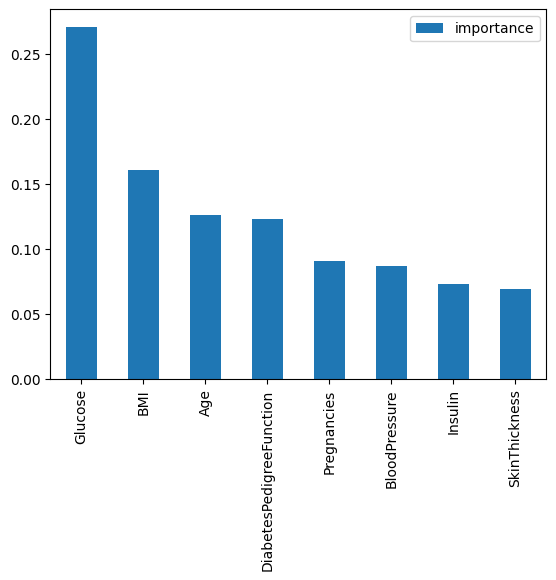

In [23]:
forest_importances.sort_values('importance', ascending=False).plot(kind='bar', sort_columns=['importance']);

## Have sklearn identify the strongest features to use
You can use the `SelectFromModel()` function in skklearn's feature_selection library.

In [24]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()  # TODO: is this the best way to view the selections? zip it with feature names?

array([False,  True, False, False, False,  True,  True, False])

In [25]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=42)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Comparing our model performance with and without selected features
For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

Therefore, data normalization won’t affect the output for Random Forest classifiers while it will affect the output for Random Forest regressors.

Regarding the regressor, the algorithm will be more affected by the high-end values if the data is not transformed. This means that they will probably be more accurate in predicting high values than low values.

Consequently, transformations such as log-transform will reduce the relative importance of these high values, hence generalizing better.

> https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf

In [26]:
# scaled data only
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_train_scaled, y_train)
# clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing score: {clf.score(X_test_scaled, y_test)}')

Training score: 1.0
Testing score: 0.5729166666666666


In [27]:
# scaled and feature-selected
# clf = LogisticRegression().fit(X_selected_train_scaled, y_train)
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_selected_train_scaled, y_train)
print(f'Training score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing score: {clf.score(X_selected_test_scaled, y_test)}')

Training score: 1.0
Testing score: 0.7083333333333334


# Logistic Regression Comparison with Scaling and Feature Selection
We can use what we've learned to improve other models that are being trained on the same data.  For an example, here we are using the features we found most effective at explaining variance in order to improve a logistic regression model.
- Below we take the features with the highest 

In [28]:
# scaled data only
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing score: {clf.score(X_test_scaled, y_test)}')

Training score: 0.6597222222222222
Testing score: 0.6458333333333334


In [29]:
# scaled and feature-selected
clf = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing score: {clf.score(X_selected_test_scaled, y_test)}')

Training score: 0.7760416666666666
Testing score: 0.7395833333333334


In [30]:
# Permutation-based feature importance
# SHAP values
# Uncertainty levels, bootstrapping
# To see how precision varies

# evaluating random forest
https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56


# how random uncorrelated trees can predict correctly
https://github.com/yiuhyuk/coin_flip_game
